## CLARA multicore scaling

In [1]:
import json
from io import StringIO

import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['axes.grid'] = True
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.4
plt.rcParams['figure.figsize'] = (12,8)
plt.rcParams['figure.autolayout'] = True

### Parameters

In [2]:
params = {
    'date': '2022-07-28',
    'host': 'nid006306',
    'chain': ['MAGFIELDS', 'FTCAL', 'FTHODO', 'FTEB', 'DCCR', 'MLTD', 'DCHAI', 'FTOFHB', 'EC', 'CVTFP', 'CTOF', 'CND', 'BAND', 'HTCC', 'LTCC', 'EBHB', 'DCTB', 'FMT', 'CVTSP', 'FTOFTB', 'EBTB', 'RICH', 'RTPC'],
    'input_file': './clas_006302.evio.00005-00009.hipo',
    'output_file': '/pscratch/sd/t/tylern/clas12/recon/test.hipo',
    'n_events': '2000',
    'jvm_options': ''
}

print(json.dumps(params, indent=4))

{
    "date": "2022-07-28",
    "host": "nid006306",
    "chain": [
        "MAGFIELDS",
        "FTCAL",
        "FTHODO",
        "FTEB",
        "DCCR",
        "MLTD",
        "DCHAI",
        "FTOFHB",
        "EC",
        "CVTFP",
        "CTOF",
        "CND",
        "BAND",
        "HTCC",
        "LTCC",
        "EBHB",
        "DCTB",
        "FMT",
        "CVTSP",
        "FTOFTB",
        "EBTB",
        "RICH",
        "RTPC"
    ],
    "input_file": "./clas_006302.evio.00005-00009.hipo",
    "output_file": "/pscratch/sd/t/tylern/clas12/recon/test.hipo",
    "n_events": "2000",
    "jvm_options": ""
}


### Benchmark

In [3]:
benchmark_data = """\
Cores,READER,MAGFIELDS,FTCAL,FTHODO,FTEB,DCCR,MLTD,DCHAI,FTOFHB,EC,CVTFP,CTOF,CND,BAND,HTCC,LTCC,EBHB,DCTB,FMT,CVTSP,FTOFTB,EBTB,RICH,RTPC,WRITER,TOTAL,Orchestrator
1,0.07,0.01,0.06,0.13,0.04,21.29,20.89,54.11,1.38,0.68,162.42,0.96,0.54,0.03,0.05,0.03,0.42,154.38,0.02,15.41,1.45,0.80,0.29,0.02,3.59,439.07,446.24
2,0.06,0.01,0.06,0.12,0.04,23.06,21.72,56.27,1.36,0.72,175.17,1.05,0.51,0.02,0.04,0.02,0.40,167.64,0.02,16.62,1.52,0.75,0.26,0.01,3.68,471.12,238.98
4,0.06,0.01,0.06,0.13,0.04,25.94,20.23,59.73,1.60,0.80,186.53,1.25,0.53,0.02,0.03,0.02,0.41,180.14,0.02,18.12,1.69,0.79,0.28,0.01,3.81,502.25,127.50
6,0.06,0.01,0.07,0.14,0.03,27.38,19.62,61.24,1.58,0.83,193.22,1.18,0.59,0.02,0.04,0.02,0.43,187.11,0.02,18.99,1.63,0.82,0.25,0.01,3.86,519.13,88.03
8,0.05,0.01,0.07,0.14,0.03,28.23,19.35,62.64,1.79,0.83,196.35,1.32,0.56,0.02,0.04,0.03,0.43,190.21,0.02,19.45,1.67,0.79,0.26,0.01,3.89,528.21,67.42
10,0.05,0.01,0.07,0.14,0.03,29.47,20.52,66.15,1.74,0.84,204.13,1.32,0.57,0.02,0.04,0.02,0.43,196.53,0.02,20.30,1.71,0.85,0.28,0.01,3.88,549.13,56.06
12,0.06,0.01,0.06,0.13,0.03,30.08,21.02,66.14,1.85,0.90,207.84,1.31,0.56,0.02,0.03,0.02,0.42,202.23,0.02,20.46,1.69,0.82,0.26,0.01,3.86,559.82,47.80
14,0.06,0.01,0.06,0.14,0.03,31.02,21.74,66.49,1.71,0.86,211.01,1.30,0.57,0.03,0.04,0.02,0.42,207.44,0.02,20.43,1.80,0.83,0.29,0.01,3.97,570.28,41.93
16,0.06,0.01,0.07,0.14,0.03,32.41,22.66,70.91,1.60,0.87,218.24,1.50,0.57,0.02,0.03,0.02,0.44,212.57,0.02,21.56,1.85,0.85,0.27,0.01,4.09,590.82,38.22
18,0.06,0.01,0.06,0.13,0.03,32.65,23.01,70.31,1.62,0.88,221.50,1.26,0.53,0.02,0.03,0.02,0.44,217.12,0.02,21.75,1.66,0.86,0.30,0.01,4.10,598.39,34.67
20,0.06,0.01,0.06,0.15,0.03,33.71,23.73,72.84,1.89,0.96,225.29,1.51,0.57,0.02,0.04,0.02,0.48,218.30,0.02,21.67,1.98,0.87,0.29,0.01,4.15,608.68,31.97
22,0.06,0.01,0.06,0.15,0.03,34.35,24.35,74.91,2.01,0.95,229.89,1.63,0.64,0.02,0.03,0.03,0.46,225.60,0.02,22.34,1.95,0.92,0.29,0.01,4.14,624.87,30.02
24,0.06,0.01,0.07,0.15,0.03,35.39,24.19,77.00,2.07,0.96,233.93,1.56,0.63,0.02,0.04,0.02,0.50,227.89,0.02,22.51,1.98,0.95,0.30,0.01,4.27,634.58,28.16
26,0.07,0.01,0.07,0.16,0.03,35.99,25.67,78.03,1.96,0.95,237.52,1.61,0.62,0.02,0.04,0.02,0.51,234.01,0.02,22.71,2.02,0.96,0.31,0.01,4.22,647.54,26.65
28,0.07,0.01,0.07,0.16,0.03,36.68,26.76,80.50,2.09,1.01,241.88,1.68,0.68,0.02,0.04,0.03,0.50,237.24,0.02,22.93,2.01,0.99,0.31,0.02,4.39,660.12,25.43
30,0.07,0.01,0.08,0.17,0.04,37.51,26.92,81.47,2.16,1.05,245.20,1.77,0.66,0.02,0.04,0.02,0.52,241.43,0.02,23.19,2.19,1.01,0.31,0.02,4.45,670.34,24.24
32,0.07,0.01,0.07,0.17,0.04,38.15,27.28,82.46,2.10,1.06,250.13,1.77,0.70,0.02,0.05,0.02,0.54,246.04,0.02,23.50,2.00,0.99,0.32,0.01,4.45,681.98,23.27
34,0.08,0.01,0.08,0.18,0.04,39.47,27.86,85.37,2.03,1.10,256.10,1.82,0.74,0.02,0.04,0.02,0.55,252.24,0.03,24.23,2.23,1.01,0.34,0.02,4.50,700.13,22.62
36,0.08,0.01,0.09,0.18,0.05,41.01,28.97,87.58,2.08,1.20,261.49,1.91,0.74,0.03,0.05,0.03,0.57,256.37,0.02,24.65,2.28,1.07,0.34,0.02,4.52,715.32,22.02
38,0.07,0.02,0.08,0.20,0.04,41.35,30.93,88.82,2.13,1.18,264.76,1.85,0.75,0.02,0.04,0.04,0.56,258.50,0.02,24.74,2.38,1.09,0.33,0.02,4.60,724.53,21.35
40,0.09,0.01,0.09,0.21,0.05,42.26,30.92,90.15,2.17,1.24,270.04,2.11,0.80,0.03,0.05,0.04,0.61,264.64,0.02,25.04,2.44,1.08,0.35,0.02,4.70,739.15,20.89
42,0.09,0.01,0.10,0.21,0.05,43.48,31.77,92.22,2.29,1.24,274.92,2.09,0.83,0.02,0.05,0.04,0.65,269.31,0.02,25.73,2.41,1.14,0.34,0.02,4.80,753.86,20.46
44,0.08,0.01,0.10,0.21,0.05,43.94,29.33,92.44,2.40,1.28,276.85,2.09,0.83,0.03,0.06,0.03,0.65,272.18,0.02,25.96,2.35,1.15,0.39,0.02,4.75,757.21,19.76
46,0.09,0.02,0.10,0.22,0.05,45.45,32.21,95.33,2.52,1.43,280.63,2.18,0.87,0.03,0.06,0.03,0.72,275.63,0.02,26.35,2.64,1.23,0.42,0.02,4.93,773.16,19.54
48,0.11,0.01,0.10,0.24,0.07,46.50,32.23,96.67,2.74,1.45,286.17,2.44,0.94,0.03,0.06,0.04,0.79,281.17,0.03,26.96,2.77,1.23,0.46,0.02,4.85,788.08,19.24
50,0.10,0.02,0.12,0.30,0.07,46.73,33.19,98.41,2.74,1.64,291.12,2.65,1.04,0.03,0.06,0.04,0.81,286.15,0.03,27.45,2.99,1.35,0.48,0.02,4.98,802.51,18.97
52,0.11,0.02,0.13,0.30,0.07,48.18,34.36,99.94,2.92,1.75,296.54,2.64,1.12,0.02,0.07,0.05,0.90,291.32,0.03,28.24,3.03,1.44,0.48,0.02,5.08,818.77,18.74
54,0.11,0.01,0.15,0.34,0.08,49.16,35.14,101.63,3.17,1.91,299.46,2.70,1.20,0.03,0.07,0.05,0.95,292.91,0.02,28.71,3.34,1.52,0.54,0.02,5.18,828.38,18.54
56,0.13,0.01,0.16,0.40,0.08,51.32,35.27,104.20,3.47,2.18,306.95,3.21,1.47,0.03,0.08,0.06,1.09,301.42,0.03,29.84,3.71,1.64,0.58,0.02,5.22,852.58,18.46
58,0.14,0.01,0.20,0.49,0.11,52.29,38.20,106.20,3.85,2.57,314.00,3.56,1.72,0.03,0.09,0.06,1.34,307.98,0.03,30.55,4.05,1.90,0.69,0.02,5.29,875.36,18.44
60,0.16,0.01,0.25,0.51,0.13,53.23,38.81,107.40,3.94,2.74,315.57,3.97,1.87,0.04,0.12,0.08,1.32,310.76,0.03,31.59,4.26,1.98,0.79,0.02,5.37,884.95,18.22
62,0.18,0.03,0.27,0.61,0.14,54.66,38.62,109.20,4.68,3.03,323.37,4.33,2.13,0.04,0.12,0.07,1.70,318.82,0.02,32.65,4.76,2.09,0.84,0.03,5.31,907.69,18.24
64,0.20,0.02,0.28,0.70,0.15,55.44,39.88,110.41,4.84,3.36,326.29,4.48,2.30,0.04,0.12,0.09,1.82,322.74,0.03,33.76,5.12,2.27,0.92,0.03,5.34,920.64,18.09"""

df = pd.read_csv(StringIO(benchmark_data))

In [4]:
df['EvRate'] = 1000 / df['Orchestrator']

pd.options.display.max_columns = None
pd.options.display.precision = 2
df

,Cores,READER,MAGFIELDS,FTCAL,FTHODO,FTEB,DCCR,MLTD,DCHAI,FTOFHB,EC,CVTFP,CTOF,CND,BAND,HTCC,LTCC,EBHB,DCTB,FMT,CVTSP,FTOFTB,EBTB,RICH,RTPC,WRITER,TOTAL,Orchestrator,EvRate
0,1,0.07,0.01,0.06,0.13,0.04,21.29,20.89,54.11,1.38,0.68,162.42,0.96,0.54,0.03,0.05,0.03,0.42,154.38,0.02,15.41,1.45,0.80,0.29,0.02,3.59,439.07,446.24,2.24
1,2,0.06,0.01,0.06,0.12,0.04,23.06,21.72,56.27,1.36,0.72,175.17,1.05,0.51,0.02,0.04,0.02,0.40,167.64,0.02,16.62,1.52,0.75,0.26,0.01,3.68,471.12,238.98,4.18
2,4,0.06,0.01,0.06,0.13,0.04,25.94,20.23,59.73,1.60,0.80,186.53,1.25,0.53,0.02,0.03,0.02,0.41,180.14,0.02,18.12,1.69,0.79,0.28,0.01,3.81,502.25,127.50,7.84
3,6,0.06,0.01,0.07,0.14,0.03,27.38,19.62,61.24,1.58,0.83,193.22,1.18,0.59,0.02,0.04,0.02,0.43,187.11,0.02,18.99,1.63,0.82,0.25,0.01,3.86,519.13,88.03,11.36
4,8,0.05,0.01,0.07,0.14,0.03,28.23,19.35,62.64,1.79,0.83,196.35,1.32,0.56,0.02,0.04,0.03,0.43,190.21,0.02,19.45,1.67,0.79,0.26,0.01,3.89,528.21,67.42,14.83
5,10,0.05,0.01,0.07,0.14,0.03,29.47,20.52,66.15,1.74,0.84,204.13,1.32,0.57,0.02,0.04,0.02,0.43,196.53,0.02,20.30,1.71,0.85,0.28,0.01,3.88,549.13,56.06,17.84
6,12,0.06,0.01,0.06,0.13,0.03,30.08,21.02,66.14,1.85,0.90,207.84,1.31,0.56,0.02,0.03,0.02,0.42,202.23,0.02,20.46,1.69,0.82,0.26,0.01,3.86,559.82,47.80,20.92
7,14,0.06,0.01,0.06,0.14,0.03,31.02,21.74,66.49,1.71,0.86,211.01,1.30,0.57,0.03,0.04,0.02,0.42,207.44,0.02,20.43,1.80,0.83,0.29,0.01,3.97,570.28,41.93,23.85
8,16,0.06,0.01,0.07,0.14,0.03,32.41,22.66,70.91,1.60,0.87,218.24,1.50,0.57,0.02,0.03,0.02,0.44,212.57,0.02,21.56,1.85,0.85,0.27,0.01,4.09,590.82,38.22,26.16
9,18,0.06,0.01,0.06,0.13,0.03,32.65,23.01,70.31,1.62,0.88,221.50,1.26,0.53,0.02,0.03,0.02,0.44,217.12,0.02,21.75,1.66,0.86,0.30,0.01,4.10,598.39,34.67,28.84


### Plots

In [5]:
title = 'Scaling test - CLARA 4.3-SNAPSHOT - nid006306 - 2000 events'
xlim = (0, 66)
xticks = range(0, 66, 4)

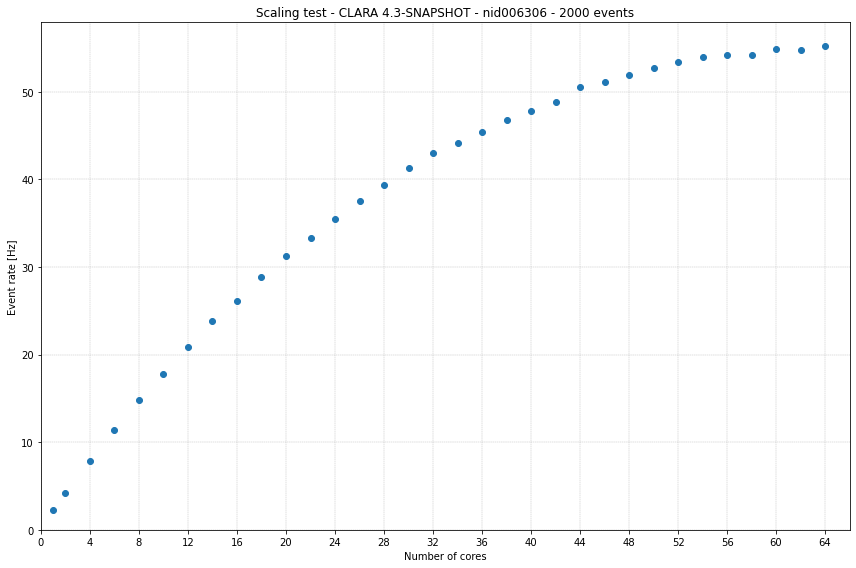

In [6]:
ax = df.plot(x='Cores', y='EvRate', style='o', legend=False, xlim=xlim, xticks=xticks)
ax.set_title(title)
ax.set_ylim(bottom=0)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Event rate [Hz]');

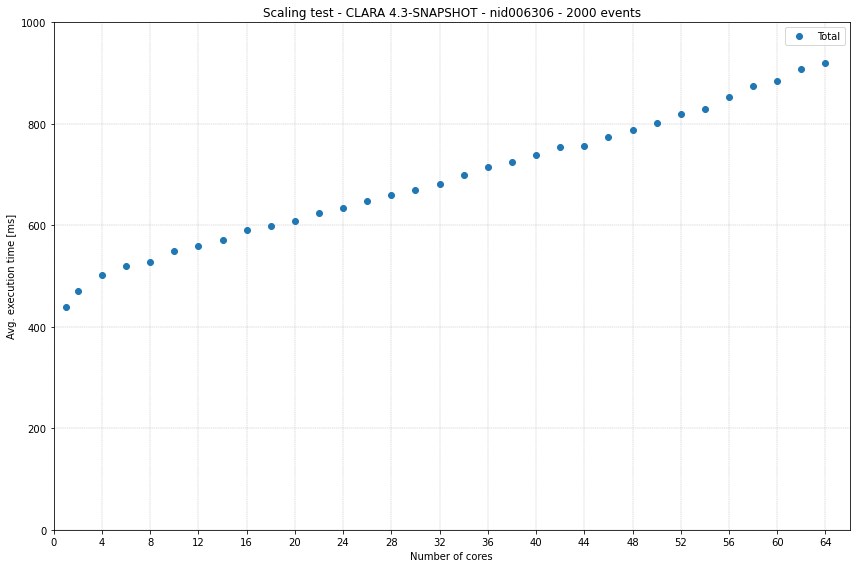

In [7]:
_, ax = plt.subplots()

df.plot(x='Cores', y='TOTAL', ax=ax, label='Total', style='o')

ax.set_title(title)
ax.set_xticks(xticks)
ax.set_xlim(xlim)
ax.set_ylim(0, 1000)
ax.set_xlabel('Number of cores')
ax.set_ylabel('Avg. execution time [ms]')
ax.legend();